# New York City Airbnb Open Data

**Overview**

Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present more personalized ways of experiencing the world. This dataset contains information,prices,number of reviews, and more.

Some he questions to answer from the data are as follows:
1. Which hosts are the busiest and why?
2. What areas have more traffic than others and why?
3. Are there any relationships between prices,number of reviews, and the number of days that a given listing is booked.

**Acknowlegments**:
This public datatset is part of Airbnb, and the original source can be found here: http://insideairbnb.com/
The dataset has the following features:
1. id : This is the listing ID
2. name: This is the name of the listing.
3. host_id : The hosts ID
4. host_name :The name of the host
5. neighbourhood_group : The location of the listing
6. neighbourhood : The location
7. latitude : latitude coordinates
8. Longitude: longitude coordinates
9. room_type : listing space type
10. Price : The price of the listing.
11. minimum_nights : The minimum number of nights stayed per listing
12. number_of_reviews: The number of reviews per listing.
13. last_review: The date of the last review
14. reviews_per_month : The number of reviews per month
15. calculated_host_listings_count
16. availability_365 : Listing availability


**Loading the dataset**

In [1]:
# importing the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
# loading the dataset
dataset = pd.read_csv('data/AB_NYC_2019.csv')
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [23]:
# Checking the datset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

From above we can infer that the datset provides a rich source of information. The are also missing values in some columns. 

**Data Cleaning and Data Wrangling**

In [24]:
# understanding missing values
dataset.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The first two columns with missing data 'name' and 'host_name' are irrelevant and insignificant for our data analysis. The 'last_review' column contains the date of the last review, this column is also irrelevant, therefre appending the missing values is not necessary. For review_per_month it contains the number of reviews per month, therefore the missing values can be appended with 0, as there were no reviews for those rows.

The 'host_name' is not only dropped for its irrelevance in the data analysis process but also for ethical reasons.

In [25]:
# dropping the irelevant rows
dataset.drop(['id','host_name','last_review'],axis=1,inplace = True)
dataset.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [26]:
# replacing the NAN values in 'reviews_per_month' with 0
dataset.fillna({'reviews_per_month':0},inplace = True)

# checking for changes
dataset.isna().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [27]:
# examining the unique type// 'neighbourhood_group' column
dataset['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [28]:
# examining the unique categories in the 'room_type' feature
dataset['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## Data Exploration and Visualization

In [35]:
# Examining which hosts- 'host_id'has the most listings
top_host = dataset['host_id'].value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

The same information is provided by the 'calculated_host_listings_count' column.

In [20]:
dataset['calculated_host_listings_count'].max()

327

In [33]:
# Finding out which listing that is
dataset[dataset['host_id'] == 219517861]['name'].head(1)

38293    Sonder | 180 Water | Incredible 2BR + Rooftop
Name: name, dtype: object

In [50]:
# visualizing the top ten hosts with the highest listings
top_host_df = pd.DataFrame(top_host).reset_index()
top_host_df = top_host_df.rename(columns = {'index' :'Host_ID','host_id':'Listing_Count'})
top_host_df

,Host_ID,Listing_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

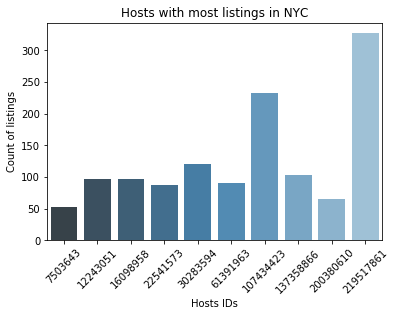

In [58]:
# Visualizing the above data using a bar plot
plot_1 = sns.barplot(x = 'Host_ID',y='Listing_Count',data = top_host_df,palette = 'Blues_d')
plot_1.set_title('Hosts with most listings in NYC')
plot_1.set_ylabel('Count of listings')
plot_1.set_xlabel('Hosts IDs')
plot_1.set_xticklabels(plot_1.get_xticklabels(),rotation = 45)



From the above we can infer that there is a good distribution of listings among the top ten hosts

**Examining Neighbourhood Groups**

In [59]:
NYC_states = dataset['neighbourhood_group'].unique()
NYC_states

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [68]:
# Getting the prices for each state in NYC
price_list = []  # list to hold the listing prices dataframe
for state in NYC_states:
    state_price = dataset[dataset['neighbourhood_group'] == state][['price']]
    price_list.append(state_price)
    

In [92]:
# descriptive statistics for the prices of the listings
stats_df_list = []  #list holds the Stats dataframe for each state
for i in range(len(price_list)):
    state_price_df= price_list[i].describe(percentiles = [0.25,0.5,0.75])
    state_price_df.reset_index(inplace = True)
    state_price_df.rename(columns = {'index':'Stats','price':NYC_states[i]},inplace = True)
    stats_df_list.append(state_price_df)

#changing the indexes of the dataframe using list comprehension    
stats_df_list = [df.set_index('Stats') for df in stats_df_list]

#combining the dataframes in the list into one dataframe
stats_df = stats_df_list[0].join(stats_df_list[1:])
stats_df



,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
count,20104.000000,21661.000000,5666.000000,373.000000,1091.000000
mean,124.383207,196.875814,99.517649,114.812332,87.496792
std,186.873538,291.383183,167.102155,277.620403,106.709349
min,0.000000,0.000000,10.000000,13.000000,0.000000
25%,60.000000,95.000000,50.000000,50.000000,45.000000
50%,90.000000,150.000000,75.000000,75.000000,65.000000
75%,150.000000,220.000000,110.000000,110.000000,99.000000
max,10000.000000,10000.000000,10000.000000,5000.000000,2500.000000


From the above table, it is observed there are some extreme values, which need to be removed for better visualization. Brooklyn and Manhattan have the most number of listings, with staten Island having the least.

Text(0.5, 1.0, 'Density and Distribution of prices for each neighbourhood group in NYC')

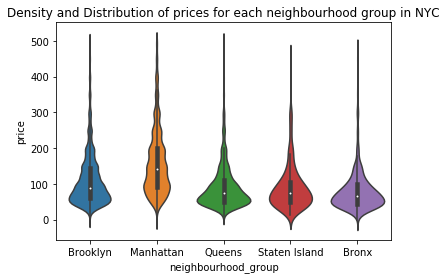

In [102]:
# Creating a visualization of the prices listings distribution across the various neighbourhoods

# removing the extreme prices from the dataset
prices_dataset = dataset[dataset.price < 500]

# creating a violinplot
plot_2 = sns.violinplot(data=prices_dataset, x = 'neighbourhood_group',y='price')
plot_2.set_title('Density and Distribution of prices for each neighbourhood group in NYC')

From the above plot, we can observe that Manhattan has the highestrange of prices for the listing with 150 dollars as the average price, followed by Brooklyn with 90 dollars per night. Queens and Staten Island appear to have the same distribution. Bronx is the cheapest among the NYC boroughs. This is expected since it is widely known that Manhattan is one of the most expensive places in the world to live in where Bronx on the other hand has lower standards of living 

**Examining the neighbourhoods**

In [126]:
# There are too many neighbourhoods compared to neighbourhood groups
# Getting the top ten
hoods = dataset['neighbourhood'].value_counts().head(10)
hoods = pd.DataFrame(hoods).reset_index()

#getting the list of top ten neighbourhoods
hood_list = hoods['index'].tolist()
hood_list

['Williamsburg',
 'Bedford-Stuyvesant',
 'Harlem',
 'Bushwick',
 'Upper West Side',
 "Hell's Kitchen",
 'East Village',
 'Upper East Side',
 'Crown Heights',
 'Midtown']

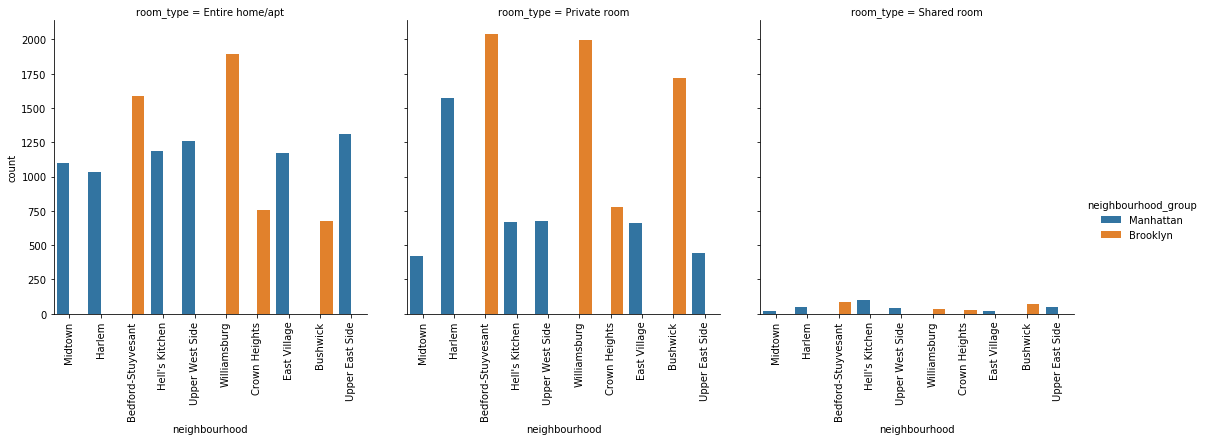

In [134]:
# grabbing the data of the topten neighbourhoods from the main dataset
hood_data = dataset[dataset['neighbourhood'].isin(hood_list)]

# Visualizing the above data using a catplot
plot_3 = sns.catplot(x = 'neighbourhood',hue = 'neighbourhood_group',
                     col='room_type',data = hood_data,kind = 'count')
plot_3.set_xticklabels(rotation=90)

The above plot consists of three subplots. Catplots enable the comparison distribution across several attributes. The Y axis contains the number of listings per the categories(neighbourhoods). The shared room type is barely featuring in the listings for the top ten neighbourhoods. Among the top ten neighbourhoods, only Manhattan and Brooklyn boroughs are the only ones featuring, which is expected since they are the most travelled destinations. 'Bedford-Stuyvesant' and 'Williamsburg' are the most popular listings in Brooklyn while 'Harlem' has the highest number of listings in Manhattan.

**Examining the Geographical Data**

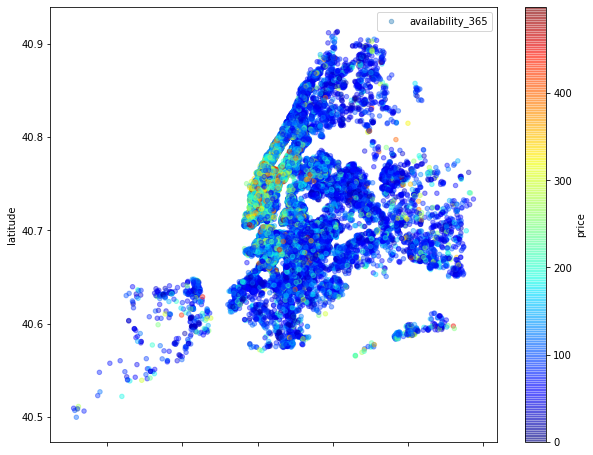

In [136]:
# Examining the geographical disribution of the prices_dataset
plot_4 = prices_dataset.plot(kind = 'scatter',x='longitude',y='latitude',label = 'availability_365',
                             c='price',cmap= plt.get_cmap('jet'),colorbar = True,alpha=0.4,figsize=(10,8))

plot_4.legend()

Creating a map of New York below the heatmap to have a fully immersive visualization

In [143]:
#maximum and minimum lat and Long
print(prices_dataset['latitude'].max())
print(prices_dataset['latitude'].min())
print(prices_dataset['longitude'].max())
print(prices_dataset['longitude'].min())

40.913059999999994
40.499790000000004
-73.71299
-74.24441999999999


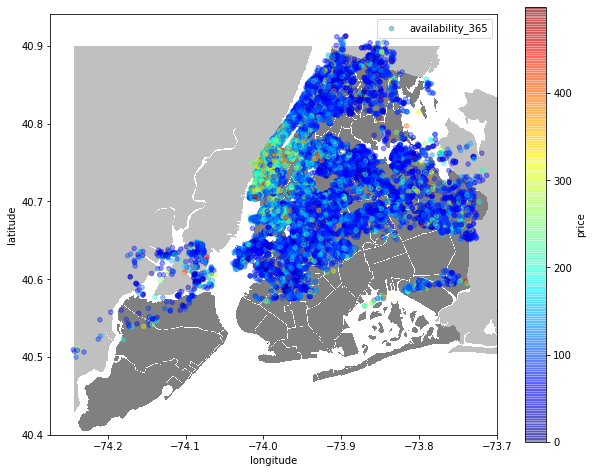

In [151]:
import urllib # a module for fetching urls

plt.figure(figsize=(10,8))  # Initializing the figure size

#loading the NYC image from google and saving it alongside the project
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
NYC_img = plt.imread(i)

#scaling the image based on the latitude and longitude max and min for proper output
plt.imshow(NYC_img,zorder=0,extent = [-74.244,-73.7,40.4,40.9])

ax = plt.gca()
#superimposing the scatter plot on the image
prices_dataset.plot(kind='scatter',x = 'longitude',y='latitude',label = 'availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar = True,alpha=0.4,zorder=5 ,ax=ax )


As seen from the above map, the listings with the highest prices are mainly concentrated in Manhattan. However, it is worth noting that the above visualization excludes extremely high values(listings with prices greater than 500 dollars) as they were treated as outliers in the analysis.

**Examining the 'name' column-How listings are named**

In [153]:
#getting the name column
dataset['name']

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [154]:
#analyzing the name column
names = [] #liststores the names

# getting the name strings from the dataset
for name in dataset.name:
    names.append(name)
    
# creating a function to split the name strings into separate words
def split_name(name):
    split_string = str(name).split()
    return split_string

name_count = [] #list for storing the counted words

for name in names:
    for word in split_name(name):
        word = word.lower()
        name_count.append(word)

In [159]:
#Using the counter module
from collections import Counter

top_25_words = Counter(name_count).most_common()[0:25]
top_25_words

[('in', 16733),
 ('room', 9389),
 ('bedroom', 7231),
 ('private', 6985),
 ('apartment', 6113),
 ('cozy', 4634),
 ('the', 3869),
 ('to', 3827),
 ('studio', 3772),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3387),
 ('1', 3357),
 ('with', 3092),
 ('2', 3079),
 ('of', 2993),
 ('east', 2967),
 ('and', 2869),
 ('manhattan', 2855),
 ('&', 2820),
 ('park', 2632),
 ('sunny', 2536),
 ('beautiful', 2320),
 ('near', 2295),
 ('williamsburg', 2293)]

In [164]:
# Converting the list to a dataframe
words_df = pd.DataFrame(top_25_words)
words_df.rename(columns = {0:'Words',1:'Count'},inplace = True)
words_df.head()

,Words,Count
0,in,16733
1,room,9389
2,bedroom,7231
3,private,6985
4,apartment,6113


[Text(0, 0, 'in'),
 Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'the'),
 Text(0, 0, 'to'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'of'),
 Text(0, 0, 'east'),
 Text(0, 0, 'and'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '&'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'williamsburg')]

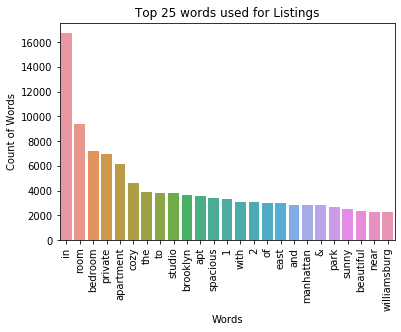

In [167]:
# Visualizing the data above using a barplot
plot_5 = sns.barplot(x='Words',y='Count',data = words_df)
plot_5.set_title('Top 25 words used for Listings')
plot_5.set_ylabel('Count of Words')
plot_5.set_xlabel('Words')
plot_5.set_xticklabels(plot_5.get_xticklabels(),rotation = 90)

We can infer from above that the hosts are simply describing their listing in a short form with very specific terms for easier search. Such words like, 'studio','private','apartment'. This technique is expected as dealing with multilingual customers can be tricky and one would want to describe their listing in a clear and concise manner that is easily understood.


**Number of Reviews**

In [172]:
# grabbing the top ten reviewed listings
top_reviewed_listings = dataset.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [173]:
top_reviewed_listings.price.mean()

65.4

This shows that majority of the listings reviewed are listed with prices less than 50 dollars. Most of them are also listed as 'Private Room'.

**Conclusion**

Through the data exploratory process we have been able to answer the questions we had, or rather the objectives for this EDA process. The analysis showed which New York boroughs had the most listings and proceeded to also find which neighbourhoods had the highest densities.

For further analysis, it would have been great to have a couple of addittional features such as positive and negative numeric ratings, the average review for each listing in order to have a better understanding of the data
 